# PCA on MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data

In [11]:
# Loading and reading the data
# You can download the mnist data set in csv format from here:
# https://www.kaggle.com/oddrationale/mnist-in-csv
train_set = pd.read_csv('data/mnist/mnist_train.csv')
test_set = pd.read_csv('data/mnist/mnist_test.csv')
train_set.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Extracting label column from the dataset
features = train_set.loc[:,'1x1':].values
labels = train_set.loc[:,'label'].values

print(features.shape)
print(labels.shape)

(60000, 784)
(60000,)


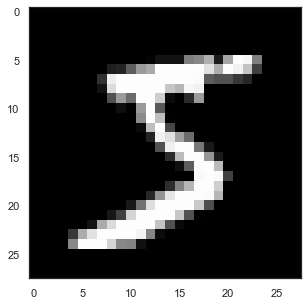

In [15]:
# Visualizing the first sample of the dataset
plt.figure(figsize = (20, 5))
img = np.array(features[0]).reshape(28,28)
plt.imshow(img, interpolation = None, cmap = 'gray')
plt.show()

In [16]:
# Standardizing the data
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

features_std[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

## PCA

In [43]:
# Applying PCA to project from 784 to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_std)

## Visualizing

In [45]:
pc_with_labels = np.concatenate((principal_components, np.expand_dims(labels, axis=1)), axis=1)
pc_with_labels.shape

(60000, 3)

In [48]:
pc_df = pd.DataFrame(data = pc_with_labels, columns = ['pc1', 'pc2', 'label'])
pc_df.head()

,pc1,pc2,label
0,-0.922315,-4.814244,5.0
1,8.709108,-7.755214,0.0
2,2.328277,9.432138,4.0
3,-6.582138,-3.746505,1.0
4,-5.183232,3.133204,9.0


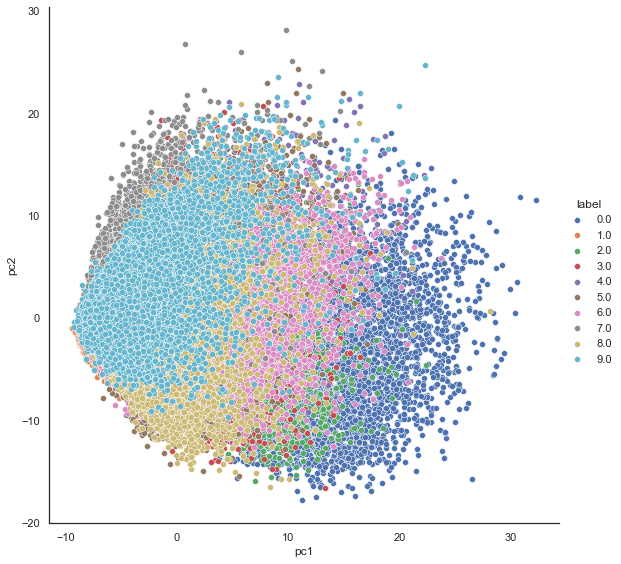

In [52]:
sns.FacetGrid(pc_df, hue = 'label', height = 8).map(sns.scatterplot, 'pc1', 'pc2').add_legend()
plt.show()